### Импорт данных и библиотек

Импорт библиотек

In [ ]:
pip install -U ridgeplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from ridgeplot import ridgeplot

Подключение к диску

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Импорт датасета

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Учеба/магистратура/2 сем/ММО/Air_Traffic_Passenger_Statistics.csv")

### Описание датасета

Просмотр первых 5 строк датасета

In [ ]:
data.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [ ]:
data.shape

(15007, 17)

Датасет содержит информацию о статистике пассажиропотока авиакомпании. Статистика пассажиропотока может быть полезным инструментом для понимания авиационной отрасли и составления планов поездок. Данные включают количество пассажиров, выполняющую авиакомпанию, опубликованную авиакомпанию, географический регион, код типа деятельности, код ценовой категории, терминал, место посадки, а также год и месяц полета

Датасет состоит из 17 колонок:
0. index - номер колонки
1. Activity Period - период активности (Date)
2. Operating Airline - авиакомпания, выполнявшая рейс(String)
3. Operating Airline IATA Code - IATA-код авиакомпании, выполнявшей рейс (String)
4. Published Airline - авиакомпания, опубликовавшая тариф на рейс (String)
5. Published Airline - IATA-код авиакомпании, опубликовавшей тариф на рейс (String)
6. GEO Summary - краткая информация о географическом регионе (String)
7. GEO Region	T - географический регион (String)
8. Activity Type Code	- вид деятельности (String)
9. Price Category Code - ценовая категория тарифа (String)
10. Terminal - терминал рейса (String)
11. Boarding Area	- зона посадки на рейс (String)
12. Passenger Count	- количество пассажиров на рейсе (Integer)
13. Adjusted Activity Type Code	- вид деятельности, скорректированный с учетом отсутствующих данных (String)
14. Adjusted Passenger Count	- количество пассажиров на рейсе, скорректированное с учетом отсутствующих данных (Integer)
15. Year	- год активности (Integer)
16. Month	- месяц активности (Integer)

Уникальные значения некоторых колонок:

In [ ]:
print(data['GEO Summary'].unique())
print(data['GEO Region'].unique())
print(data['Activity Type Code'].unique())
print(data['Price Category Code'].unique())
print(data['Terminal'].unique())
print(data['Boarding Area'].unique())
print(data['Adjusted Activity Type Code'].unique())

['Domestic' 'International']
['US' 'Canada' 'Asia' 'Europe' 'Australia / Oceania' 'Mexico'
 'Central America' 'Middle East' 'South America']
['Deplaned' 'Enplaned' 'Thru / Transit']
['Low Fare' 'Other']
['Terminal 1' 'International' 'Terminal 3' 'Other' 'Terminal 2']
['B' 'G' 'A' 'E' 'C' 'F' 'Other' 'D']
['Deplaned' 'Enplaned' 'Thru / Transit * 2']


Проверка на нулевые значения

In [ ]:
data.isnull().sum()

index                           0
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

Нулевые значения всего в 2х колонках, но для анализа мы их использовать не будем. Вырежем колонки, которые не будем использовать:

In [ ]:
data=data.drop(columns=['index','Operating Airline IATA Code','Published Airline IATA Code'],axis=1)

In [ ]:
data.isnull().sum().sum()

0

### Исследование структуры датасета

#### Корреляционный анализ (4num)

Исследуем зависимости между числовыми переменными датасета:

<ipython-input-89-fa7b33d7a751>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



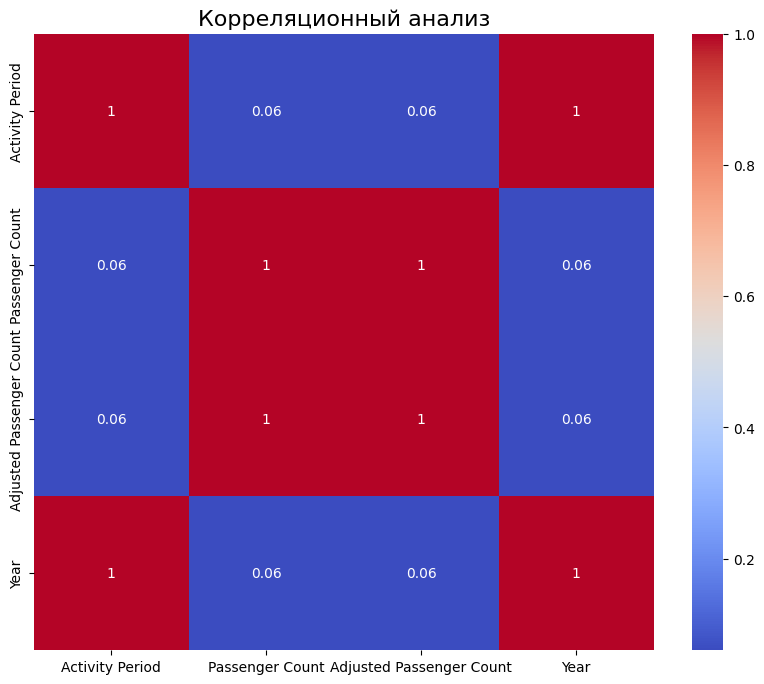

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.heatmap(data.corr().round(2), cmap= 'coolwarm', annot=True)
ax.set_title('Корреляционный анализ', fontsize=16)
plt.show()

Как видим, зависимости отсутсвуют, т.к. все значения малы (диагонали не рассматриваем)

#### Круговая диаграмма (1num-1cat)

Посмотрим распределение количества пассажиров по терминалам с помощью круговой диаграммы

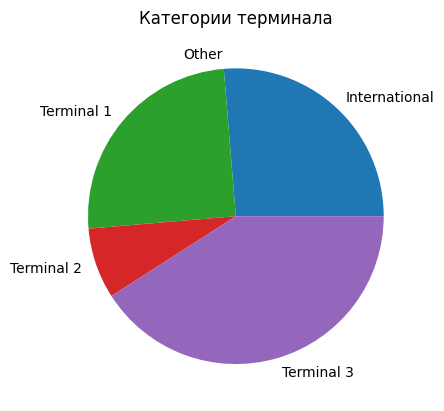

In [ ]:
Terminal=data.groupby('Terminal').agg({"Adjusted Passenger Count":sum})
plt.title("Категории терминала")
plt.pie(x=Terminal['Adjusted Passenger Count'],labels=Terminal.index,radius=1)
plt.show()

На диаграмме видно, что терминал 3 используется чаще всего, а терминал 2 реже всего. Эту информацию мы можем применить для того, чтобы разгрузить терминалы при дальнейшем составлении расписания рейсов.

#### Линейная диаграмма (2num)

Построим линейную диаграмму, чтобы отследить общий поток пассажиров в разные года. Перед этим сгруппируем число пассажиров по году.

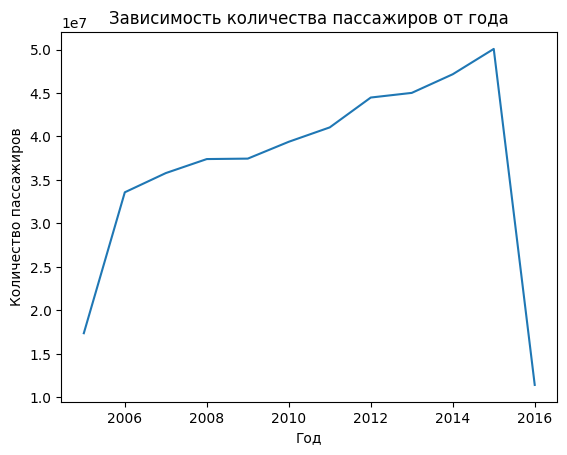

In [ ]:
passengers_count=data.groupby('Year').agg({"Adjusted Passenger Count":sum})
plt.plot(passengers_count.index.tolist(), passengers_count.values)
plt.title('Зависимость количества пассажиров от года')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.show()

По диграмме видим, что поток пассажиров растет с каждым годом и достигает пика в 2015 году. В 2016 кол-во пассажиров невелико скорее всего из-за того, что на момент сбора данных этот год еще не закончился и все данные не были собраны.

#### Столбчатая диаграмма (1num-1cat)

Данные в датасеты собраны за период от 2005 до 2016 года

In [ ]:
print(data['Year'].min())
print(data['Year'].max())

2005
2016


Посмотрим количество пассажиров по регионам с помощью столбчатой диаграммы (barplot):

<Axes: title={'center': 'Количество пассажиров по регионам'}, xlabel='GEO Region', ylabel='Passenger Count'>

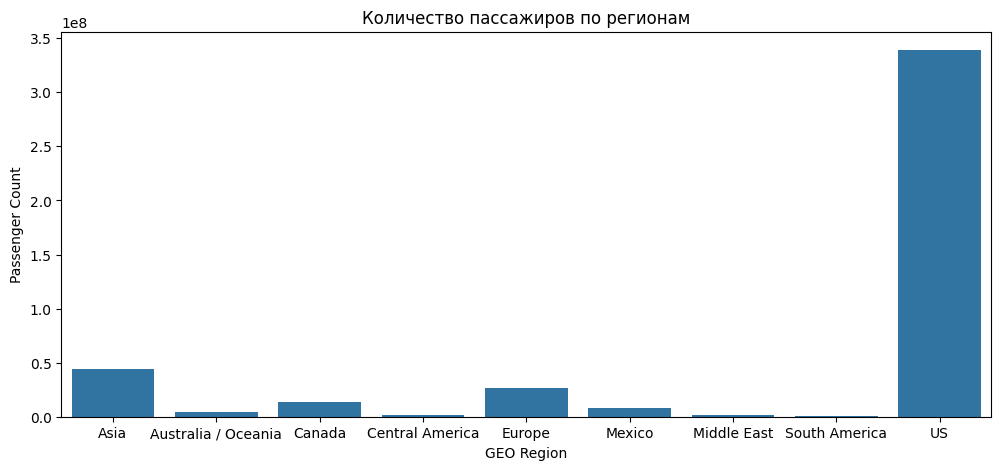

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Количество пассажиров по регионам")
plt.ylabel("Passenger Count")

GEO_Region=data.groupby('GEO Region').agg({"Adjusted Passenger Count":sum})
sns.barplot(x=GEO_Region.index, y=GEO_Region['Adjusted Passenger Count'])

По графику видно, что больше всего пассажиров из US, далее из Азии, Европы, Канады, Мексики и остальных.

Далее посмотрим распределение количества пассажиров по месяцам:

<Axes: title={'center': 'Количество пассажиров по месяцам'}, xlabel='Month', ylabel='Passenger Count'>

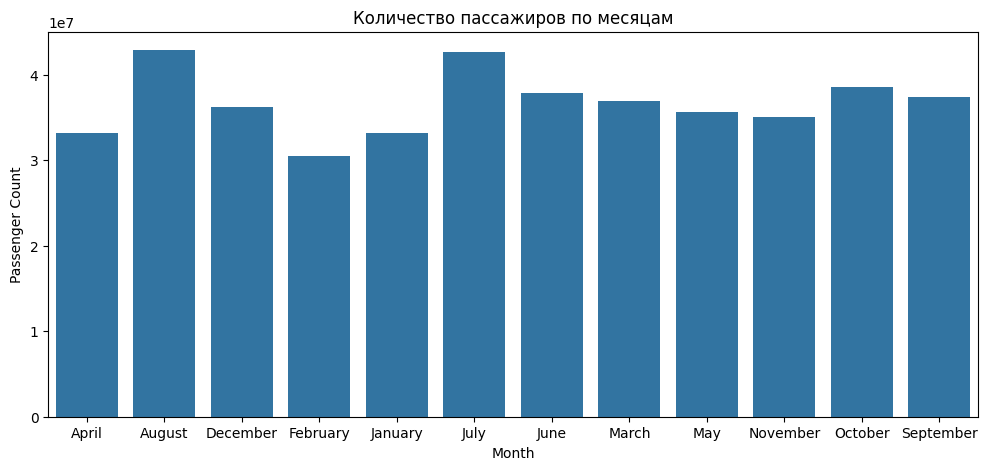

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Количество пассажиров по месяцам")
plt.ylabel("Passenger Count")

count=data.groupby('Month').agg({"Adjusted Passenger Count":sum})
sns.barplot(x=count.index, y=count['Adjusted Passenger Count'])

По графику видно, что больше всего пассажиров путешествует в Августе и Июле (то есть летом), а реже всего в феврале (то есть зимой)

#### График хребтов (2num-2cat)

С помощью графика хребтов посмотрим распределения потока пассажиров за несколько лет для разных стран

In [ ]:
passengers_count=data.groupby(['GEO Region', 'Year', 'Month']).agg({'Adjusted Passenger Count': 'sum'})['Adjusted Passenger Count']
regions = data['GEO Region'].unique()
passengers_count_arrays={regions[i]: [] for i in range(0, len(regions))}

for i in range(0, len(passengers_count)):
  region = passengers_count.keys()[i][0]

  array = passengers_count_arrays.get(region)
  array.append(passengers_count.iloc[i])
  passengers_count_arrays[region] = array

fig = ridgeplot(samples=list(passengers_count_arrays.values()), labels=list(passengers_count_arrays.keys()))
fig.update_layout(height=500, width=800)
fig.show()

По графику видим, что в US поток самый огромный и колеблется от 1.67 до 3.66 млн пассажиров / мес. В Южной Америке, Среднем Востоке и Центральной Америке поток пассажиро в мал и почти не колеблется. В остальных регионах поток не превышает пол миллиона пассажиров / мес и не значительно колеблется.

#### Тепловая карта (1num-3cat)

C помощью тепловой карты можем посмотреть распределение числа пассажиров по компаниям, выполнявшим рейс. При этом, все компании сгруппированы по странам, а страны разделены на "международные" и "домашние".

In [ ]:
fig = px.treemap(data, path=[px.Constant("Passengers count"), 'GEO Summary', 'GEO Region', 'Operating Airline'], values='Adjusted Passenger Count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()